# CPE 695: Homework 2

#### Logistical Regression       

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib as plt
%matplotlib inline

In [3]:
#df = pd.read_csv('C://Users//amyhu//Google Drive//CPE 695//week5//data.csv')
df = pd.read_csv('C://Users//hp//Google Drive//CPE 695//week5//data.csv')

df.head()

,score-1,score-2,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


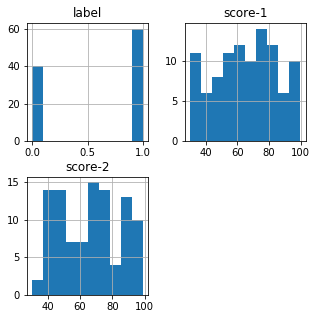

In [4]:
fig = df.hist(figsize=[5,5])

In [5]:
#prepare the data
N = df.shape
xplant = np.array(df.loc[:,'score-1':'score-2'])
ones = np.array([1]*N[0])
xplant = np.hstack((xplant, np.atleast_2d(ones).T))


yplant = np.array(df.loc[:,'label'])

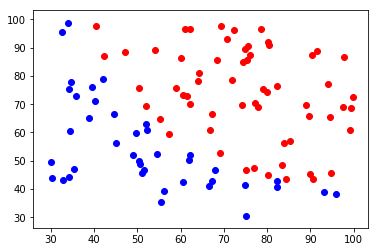

In [6]:
#plot the dataset
label_1 = xplant[yplant==1]
label_0 = xplant[yplant==0]
plt.pyplot.scatter(label_1[:,0],label_1[:,1],color='red')
plt.pyplot.scatter(label_0[:,0],label_0[:,1],color='blue')

In [7]:
xplant[0]

array([ 34.62365962,  78.02469282,   1.        ])

#### Method 1: advanced optimization

In [8]:
import math as mth
import scipy.optimize 
def sigmoid(w):
    return float(1) / (1 + mth.e**(np.dot(-xplant,w)))

import scipy.optimize 
def log_loss(w):
    loss = 0.
    sigmoid_ = sigmoid(w)
    loss += sum(-yplant*np.log(sigmoid_) - (1-yplant)*np.log(1-sigmoid_))
    n =len(yplant)    
    return loss/n

w0 = np.array([0, 0, 0])
print('sig =',sigmoid(np.array([0, 0, 0])), log_loss(w0))

res = scipy.optimize.minimize(log_loss, w0, method='nelder-mead',options={'xtol': 1e-8, 'disp': True})

print(res.x)

sig = [ 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5] 0.69314718056
Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 203
         Function evaluations: 383
[  0.20623171   0.2014716  -25.16133336]


<a list of 1 text.Text objects>

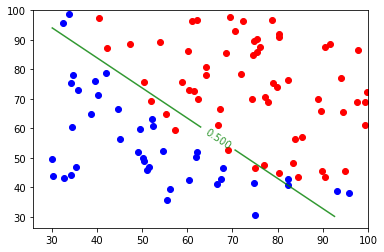

In [19]:
#plot the data set and the regression
label_1 = xplant[yplant==1]
label_0 = xplant[yplant==0]
plt.pyplot.scatter(label_1[:,0],label_1[:,1],color='red')
plt.pyplot.scatter(label_0[:,0],label_0[:,1],color='blue')


xlist = np.linspace(30, 100, 100); ylist = np.linspace(30, 100, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = 1/(1+np.exp(-res.x[2] - res.x[0]*X - res.x[1]*Y))
levels=1;ctp = plt.pyplot.contour(X, Y, Z, levels ,colors='g',alpha=0.8)
plt.pyplot.clabel(ctp, inline=1)

#### Method 2: gradient descent

In [16]:
xplant_2=np.array(df.loc[:,'score-1':'score-2'])
yplant_2=np.array(df.loc[:,'label'])

In [11]:
import math as mth
def sigmoid_2(w,x): 
    return float(1) / (1 + mth.e**(np.dot(-x,w)))

def log_loss_2(x,y,w): # the total logloss
    loss = 0.
    n =len(y)
    for i in range(0,len(x)):
        xx = np.insert(x[i],0,1)
        yy = y[i]
        sigmoid_ = sigmoid_2(w,xx)
        loss += -yy*np.log(sigmoid_) - (1-yy)*np.log(1-sigmoid_)
    return loss/n


def logistic_regression(x,y,nrepeat):
    
    scale = [max(max(abs(x)), 0.0001) for x in np.transpose(x)]
    x = x/scale
    scale.insert(0,1.0)
    k = len(x[0])
    t = 0.02
    n = len(x)
    iter = 0
    w = np.random.uniform(-1,1,k+1)
    for j in range(0,nrepeat):
        for i in range(0,len(x)):
            iter += 1
            xx = np.insert(x[i],0,1)
            yy = y[i]
            tt = t*(n*nrepeat+1-iter)/(n*nrepeat+1)
            w = w + tt*(yy - sigmoid_2(w,xx))*xx
        if j%(1000) == 1:
            print(" passes = ", j," samples seen = ", iter, " w= ",w/scale," loss = ", log_loss_2(x,y,w))
    print("total passes = ",j," total samples seen = ", iter," w= ",w/scale," loss = ", log_loss_2(x,y,w))

    return w/scale 

In [17]:
model_plants = logistic_regression(xplant_2, yplant_2, 28000)

 passes =  1  samples seen =  200  w=  [ 0.1628497  -0.00388687  0.01011907]  loss =  0.655477949449
 passes =  1001  samples seen =  100200  w=  [-14.70325091   0.12254337   0.11710385]  loss =  0.228623774328
 passes =  2001  samples seen =  200200  w=  [-18.29088539   0.15121165   0.14610119]  loss =  0.212648606435
 passes =  3001  samples seen =  300200  w=  [-20.24994932   0.16687807   0.16196999]  loss =  0.207806791041
 passes =  4001  samples seen =  400200  w=  [-21.49615087   0.17684763   0.17206642]  loss =  0.205784909288
 passes =  5001  samples seen =  500200  w=  [-22.34830617   0.18366697   0.1789675 ]  loss =  0.204804625432
 passes =  6001  samples seen =  600200  w=  [-22.95683127   0.18853806   0.18389187]  loss =  0.204284772785
 passes =  7001  samples seen =  700200  w=  [-23.40438118   0.19212158   0.1875099 ]  loss =  0.203991595845
 passes =  8001  samples seen =  800200  w=  [-23.74076823   0.19481578   0.19022574]  loss =  0.203818453437
 passes =  9001  sa

In [20]:
model_plants

array([-24.97384293,   0.20470867,   0.19996865])

<a list of 1 text.Text objects>

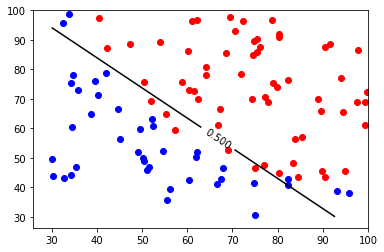

In [22]:
#fig_1=plt.figure()
label_1 = xplant[yplant==1]
label_0 = xplant[yplant==0]
plt.pyplot.scatter(label_1[:,0],label_1[:,1],color='red')
plt.pyplot.scatter(label_0[:,0],label_0[:,1],color='blue')


xlist = np.linspace(30, 100, 100); ylist = np.linspace(30, 100, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = 1/(1+np.exp(-model_plants[0] - model_plants[1]*X - model_plants[2]*Y))
levels=1;ctp = plt.pyplot.contour(X, Y, Z, levels ,colors='k')
plt.pyplot.clabel(ctp, inline=1)